# Importamos librerias

In [90]:
import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [85]:
path_ladri1 = '/Users/francobenko/Documents/DataSets/TP4_CV/ladrillos1.png'
path_ladri2 = '/Users/francobenko/Documents/DataSets/TP4_CV/ladrillos2.png'

path_oveja1 = '/Users/francobenko/Documents/DataSets/TP4_CV/oveja1.png'
path_oveja2 = '/Users/francobenko/Documents/DataSets/TP4_CV/oveja2.png'

path_cielo = '/Users/francobenko/Documents/DataSets/TP4_CV/cielo.png'


path_piedras1 = '/Users/francobenko/Documents/DataSets/TP4_CV/piedras1.png'
path_piedras2 = '/Users/francobenko/Documents/DataSets/TP4_CV/piedras2.png'

In [93]:
#Creado de imagenes
img_ladri1 = cv.imread(path_ladri1)
img_ladri2 = cv.imread(path_ladri2)
img_oveja1 = cv.imread(path_oveja1)
img_oveja2 = cv.imread(path_oveja2)
img_cielo = cv.imread(path_cielo)
img_piedras1 = cv.imread(path_piedras1)
img_piedras2 = cv.imread(path_piedras2)

#Pasando a escala de frises
gray_ladri1 = cv.cvtColor(img_ladri1, cv.COLOR_BGR2GRAY)
gray_ladri1 = cv.medianBlur(gray_ladri1,5)
gray_ladri2 = cv.cvtColor(img_ladri2, cv.COLOR_BGR2GRAY)
gray_ladri2 = cv.medianBlur(gray_ladri2,5)

gray_oveja1 = cv.cvtColor(img_oveja1, cv.COLOR_BGR2GRAY)
gray_oveja1 = cv.medianBlur(gray_oveja1,5)
gray_oveja2 = cv.cvtColor(img_oveja2, cv.COLOR_BGR2GRAY)
gray_oveja2 = cv.medianBlur(gray_oveja2,5)

gray_cielo = cv.cvtColor(img_cielo, cv.COLOR_BGR2GRAY)
gray_cielo = cv.medianBlur(gray_cielo,5)

gray_piedras1 = cv.cvtColor(img_piedras1, cv.COLOR_BGR2GRAY)
gray_piedras1 = cv.medianBlur(gray_piedras1,5)
gray_piedras2 = cv.cvtColor(img_piedras2, cv.COLOR_BGR2GRAY)
gray_piedras2 = cv.medianBlur(gray_piedras2,5)




# Prueba Caserisima

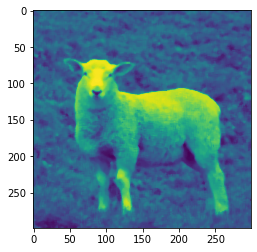

In [80]:
#Creado de imagenes
img = cv.imread(path_oveja1)

#Pasando a escala de frises
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)

plt.imshow(gray)
plt.show()

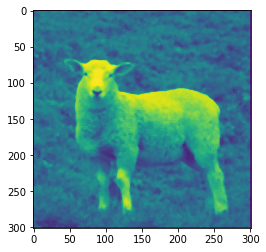

In [60]:
gray_p = np.copy(gray)
gray_borde_replicado = np.zeros((301,301))
gray_borde_replicado[1:300,1:300] = gray_p
plt.imshow(gray_borde_replicado)
plt.show()

In [61]:


pesos = np.array([[2**7,2**6,2**5], [2**0,0,2**4], [2**1,2**2,2**3]])

for columna in range(0, gray_p.shape[0]):
    for fila in range(0, gray_p.shape[0]):
        valor = gray_p[fila,columna]
        ventana = gray_borde_replicado[0+fila:3+fila,0+columna:3+columna]
        mask_0 = ventana<valor
        ventana[mask_0] = 0
        ventana[~(mask_0)] = 1
        lbp = np.sum(ventana * pesos)
        gray_p[fila,columna] = lbp

        

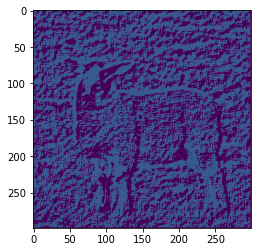

In [62]:
plt.imshow(gray_p)
plt.show()

# Armado de funcion (algo mas decente)

In [94]:
def lbp_casero(entrada):
    imagen = np.copy(entrada) 
    imagen_borde_aumentado = np.zeros((imagen.shape[0]+2,imagen.shape[1]+2))
    imagen_borde_aumentado[1:imagen.shape[0]+1,1:imagen.shape[1]+1] = imagen
    
    for columna in range(0, imagen.shape[0]):
        for fila in range(0, imagen.shape[0]):
            valor = imagen[fila,columna]
            ventana = imagen_borde_aumentado[0+fila:3+fila,0+columna:3+columna]
            mask_0 = ventana<valor
            ventana[mask_0] = 0
            ventana[~(mask_0)] = 1
            lbp = np.sum(ventana * pesos)
            imagen[fila,columna] = lbp
    
    return imagen

In [95]:
im_lbp_ladrillos1 = lbp_casero(gray_ladri1)
im_lbp_ladrillos2 = lbp_casero(gray_ladri2)
im_lbp_oveja1 = lbp_casero(gray_oveja1)
im_lbp_oveja2 = lbp_casero(gray_oveja2)
im_lbp_cielo = lbp_casero(gray_cielo)
im_lbp_piedras1 = lbp_casero(gray_piedras1)
im_lbp_piedras2 = lbp_casero(gray_piedras2)

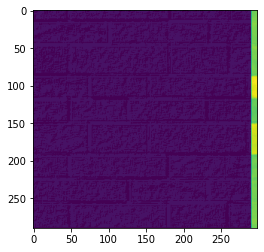

In [96]:
plt.imshow(im_lbp_ladrillos1)
plt.show()

## Comparacion de fotos

Text(0.5, 1.0, 'Imagen LBP Piedras')

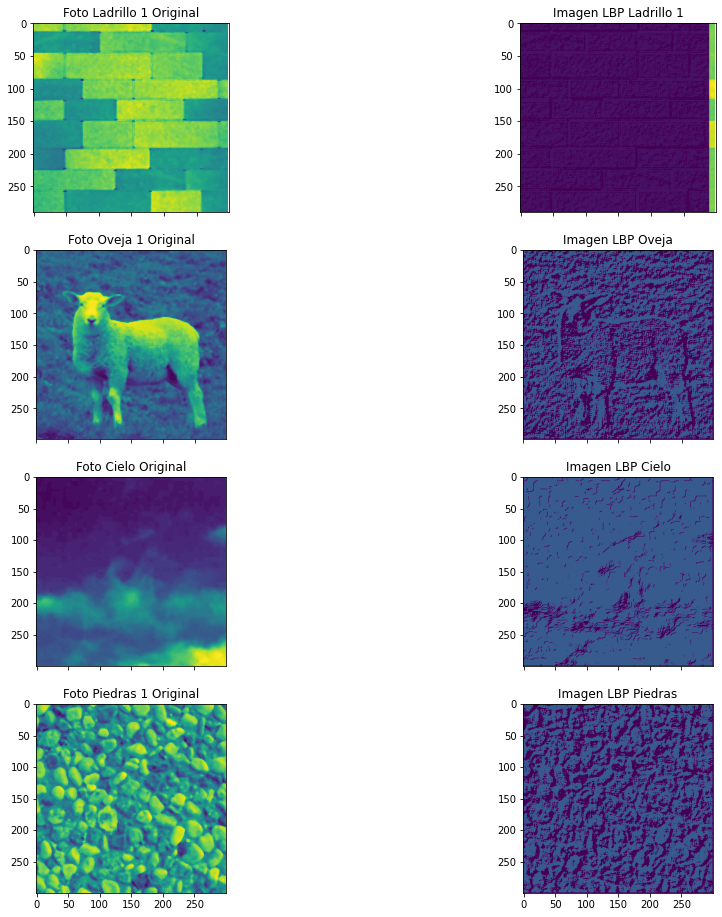

In [97]:
#Establecemos la figura del grafico y su tamaño
#Le definimos que van a ser varios graficos
_, axes = plt.subplots(4,2,sharex=True, figsize=(16,16))

#graficos

axes[0,0].imshow(gray_ladri1)
axes[0,0].set_title('Foto Ladrillo 1 Original')

axes[0,1].imshow(im_lbp_ladrillos1)
axes[0,1].set_title('Imagen LBP Ladrillo 1')

axes[1,0].imshow(gray_oveja1)
axes[1,0].set_title('Foto Oveja 1 Original')

axes[1,1].imshow(im_lbp_oveja1)
axes[1,1].set_title('Imagen LBP Oveja')

axes[2,0].imshow(gray_cielo)
axes[2,0].set_title('Foto Cielo Original')

axes[2,1].imshow(im_lbp_cielo)
axes[2,1].set_title('Imagen LBP Cielo')

axes[3,0].imshow(gray_piedras1)
axes[3,0].set_title('Foto Piedras 1 Original')

axes[3,1].imshow(im_lbp_piedras1)
axes[3,1].set_title('Imagen LBP Piedras')

## Comparacion de Histogramas

Text(0.5, 1.0, 'Hist LBP Piedras')

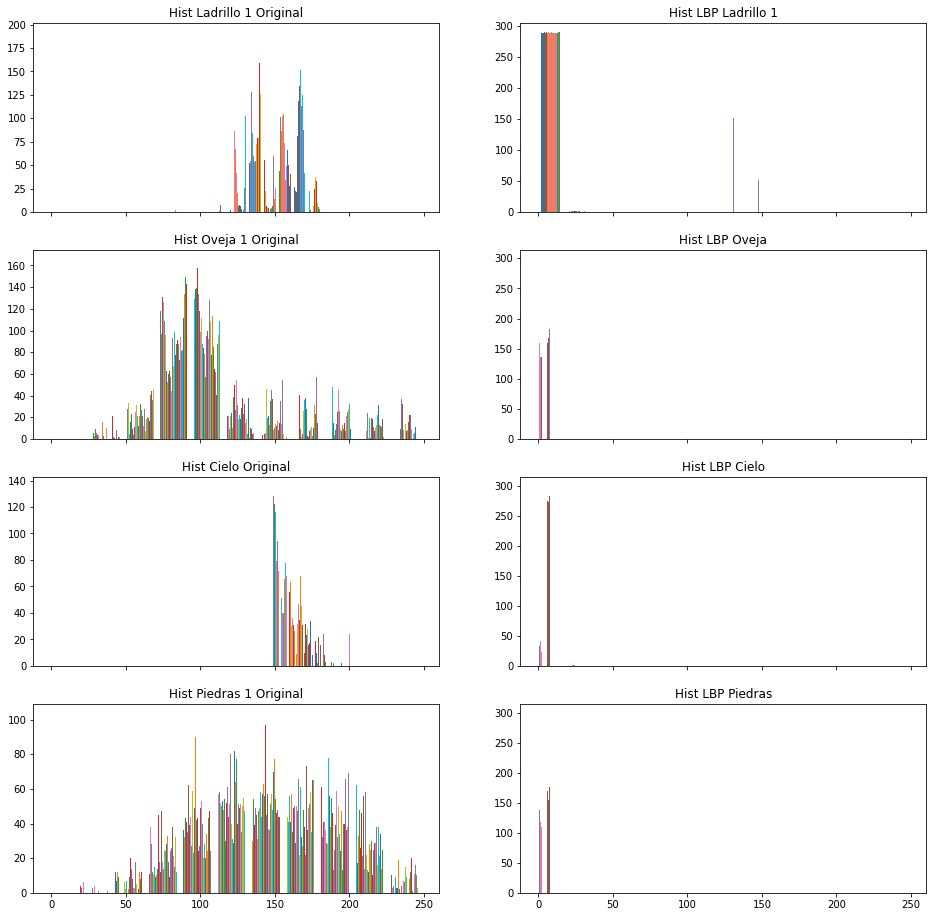

In [105]:
#Establecemos la figura del grafico y su tamaño
#Le definimos que van a ser varios graficos
_, axes = plt.subplots(4,2,sharex=True, figsize=(16,16))

#graficos

axes[0,0].hist(gray_ladri1)
axes[0,0].set_title('Hist Ladrillo 1 Original')

axes[0,1].hist(im_lbp_ladrillos1)
axes[0,1].set_title('Hist LBP Ladrillo 1')

axes[1,0].hist(gray_oveja1)
axes[1,0].set_title('Hist Oveja 1 Original')

axes[1,1].hist(im_lbp_oveja1)
axes[1,1].set_title('Hist LBP Oveja')

axes[2,0].hist(gray_cielo)
axes[2,0].set_title('Hist Cielo Original')

axes[2,1].hist(im_lbp_cielo)
axes[2,1].set_title('Hist LBP Cielo')

axes[3,0].hist(gray_piedras1)
axes[3,0].set_title('Hist Piedras 1 Original')

axes[3,1].hist(im_lbp_piedras1)
axes[3,1].set_title('Hist LBP Piedras')